In [1]:
!pip install scikit-learn

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

In [4]:
ball_by_ball = pd.read_csv("C:\\Users\\Prakhar\\Desktop\\Jigsaw Class\\BYOP\\IPL Dataset\\IPL Ball-by-Ball 2008-2020.csv")

In [6]:
match_data= pd.read_csv("C:\\Users\\Prakhar\\Desktop\\Jigsaw Class\\BYOP\\IPL Dataset\\IPL Matches 2008-2020.csv")

In [7]:
ball_by_ball.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [8]:
ball_by_ball.shape

(193468, 18)

In [9]:
match_data.shape

(816, 17)

In [10]:
match_data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [11]:
merged_file=pd.merge(ball_by_ball, match_data, 
                   on='id', 
                   how='inner')

In [12]:
merged_file.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,...,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,...,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,...,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,...,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,...,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,...,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen


In [13]:
merged_file.shape

(193468, 34)

In [14]:
merged_file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193468 entries, 0 to 193467
Data columns (total 34 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                193468 non-null  int64  
 1   inning            193468 non-null  int64  
 2   over              193468 non-null  int64  
 3   ball              193468 non-null  int64  
 4   batsman           193468 non-null  object 
 5   non_striker       193468 non-null  object 
 6   bowler            193468 non-null  object 
 7   batsman_runs      193468 non-null  int64  
 8   extra_runs        193468 non-null  int64  
 9   total_runs        193468 non-null  int64  
 10  non_boundary      193468 non-null  int64  
 11  is_wicket         193468 non-null  int64  
 12  dismissal_kind    9495 non-null    object 
 13  player_dismissed  9495 non-null    object 
 14  fielder           6784 non-null    object 
 15  extras_type       10233 non-null   object 
 16  batting_team      19

In [ ]:
#merged_file. drop(“column_name”, axis=1, inplace=True)

In [15]:
merged_copy = merged_file.copy()

In [16]:
merged_copy.drop('id', axis=1, inplace=True)

In [17]:
merged_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193468 entries, 0 to 193467
Data columns (total 33 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   inning            193468 non-null  int64  
 1   over              193468 non-null  int64  
 2   ball              193468 non-null  int64  
 3   batsman           193468 non-null  object 
 4   non_striker       193468 non-null  object 
 5   bowler            193468 non-null  object 
 6   batsman_runs      193468 non-null  int64  
 7   extra_runs        193468 non-null  int64  
 8   total_runs        193468 non-null  int64  
 9   non_boundary      193468 non-null  int64  
 10  is_wicket         193468 non-null  int64  
 11  dismissal_kind    9495 non-null    object 
 12  player_dismissed  9495 non-null    object 
 13  fielder           6784 non-null    object 
 14  extras_type       10233 non-null   object 
 15  batting_team      193468 non-null  object 
 16  bowling_team      19

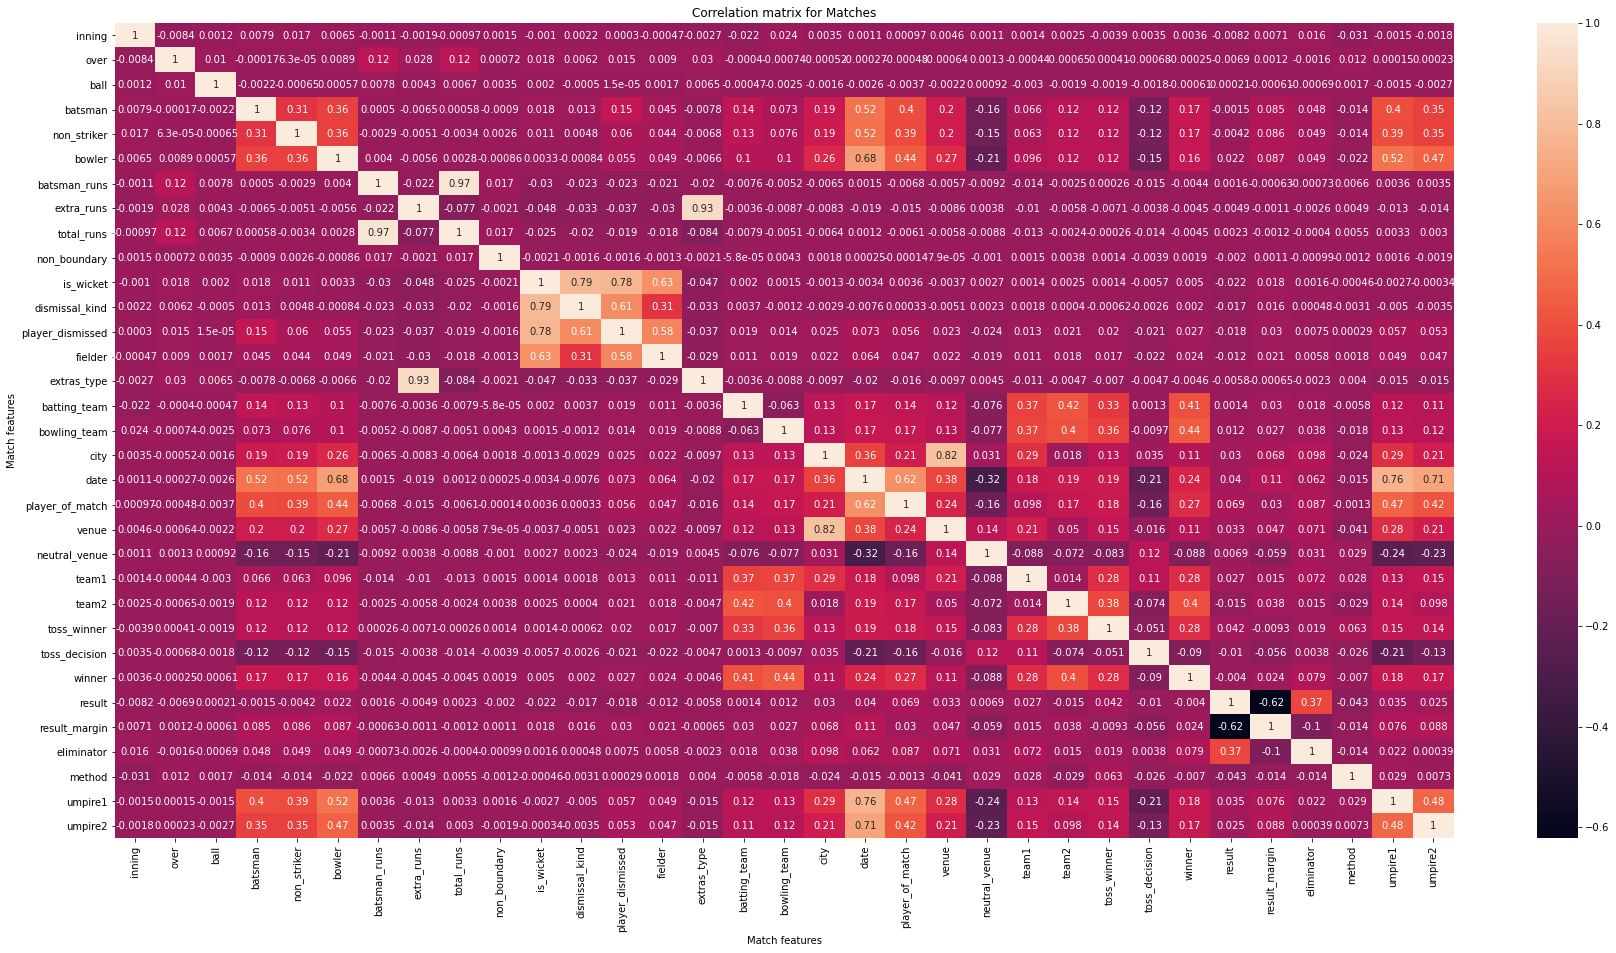

In [18]:
plt.figure(figsize=(30, 15))
correlation_matrix = merged_copy.apply(lambda x: x.factorize()[0]).corr(method='pearson')
sns.heatmap(correlation_matrix, annot = True)
plt.title("Correlation matrix for Matches")
plt.xlabel("Match features")
plt.ylabel("Match features")
plt.show()

In [19]:
corelation = merged_copy.corr()

<AxesSubplot:>

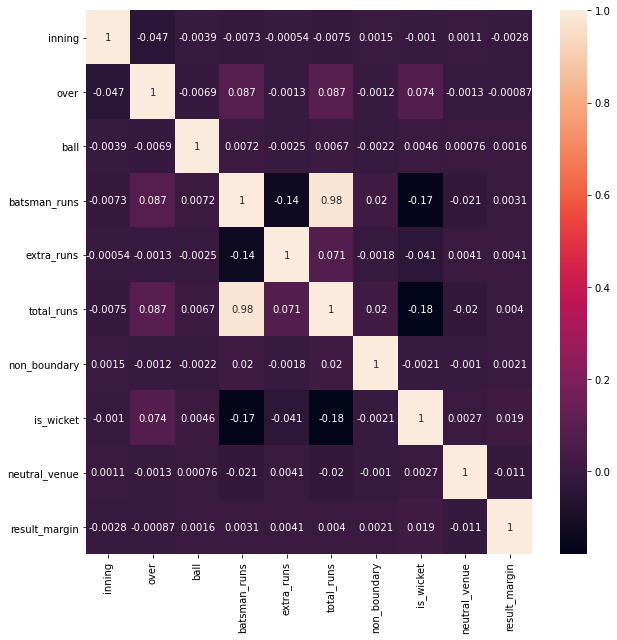

In [20]:
plt.figure(figsize=(10, 10))
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot=True)

In [29]:
training_data, testing_data = train_test_split(merged_copy, test_size=0.2, random_state=25)

print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

No. of training examples: 154774
No. of testing examples: 38694


In [ ]:
merged_copy['column name'] = df['column name'].replace(['old value'],'new value')